## importing the dependies

In [80]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

### data collection and processing

In [81]:
# loading the data from csv to pandas dataframe
car_dataset=pd.read_csv("C:\machine learning\machine learning datasets\CAR DETAILS FROM CAR DEKHO.csv")

In [82]:
car_dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [83]:
# to check the number of roes and columns 
car_dataset.shape

(4340, 8)

In [84]:
# to check the null values 
car_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [85]:
# to get total information about this dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [86]:
# checking the distribution of categorical data 


print(car_dataset["owner"].value_counts())
print(car_dataset["fuel"].value_counts())
print(car_dataset["transmission"].value_counts())
print(car_dataset["seller_type"].value_counts())


owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64
fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64


# Encoding the categorical data

In [87]:
# encoding fuel column
car_dataset.replace({"fuel":{"Diesel":0,"Petrol":1,'CNG':2,'LPG':3,"Electric":4}},inplace=True)
car_dataset.replace({"owner":{"First Owner":0,"Second Owner":1,'Third Owner':2,'Fourth & Above Owner':3,"Test Drive Car":4}},inplace=True)
car_dataset.replace({"transmission":{"Manual":0,"Automatic":1}},inplace=True)
car_dataset.replace({"seller_type":{"Individual":0,"Dealer":1,'Trustmark Dealer':2}},inplace=True)


In [88]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,1


## splitting the data into  data and target

In [89]:
x=car_dataset.drop(['name',"selling_price"],axis=1)
y=car_dataset["selling_price"]

In [90]:
x

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,1,0,0,0
1,2007,50000,1,0,0,0
2,2012,100000,0,0,0,0
3,2017,46000,1,0,0,0
4,2014,141000,0,0,0,1
...,...,...,...,...,...,...
4335,2014,80000,0,0,0,1
4336,2014,80000,0,0,0,1
4337,2009,83000,1,0,0,1
4338,2016,90000,0,0,0,0


In [91]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

## splitting the data into testing and training data

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [93]:
print(x.shape,x_train.shape,x_test.shape)

(4340, 6) (3472, 6) (868, 6)


# 1.linear regression

In [94]:
# loading the linear regression model
lin_reg_model=LinearRegression()

In [95]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

## model evaluation

In [96]:
# prediction on training data
training_data_pred=lin_reg_model.predict(x_train)

In [97]:
training_data_pred

array([ 670520.81532709,  565757.5791575 , 1307208.45383596, ...,
        532135.35068427,  403199.2013303 ,  546420.41405587])

In [98]:
# r square error
error_score=metrics.r2_score(y_train,training_data_pred)
error_score

0.43922410637048825

## visualize the actual price and pricted prices

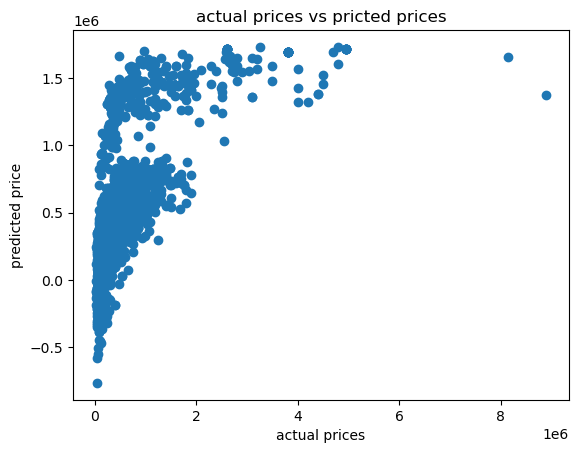

In [99]:
plt.scatter(y_train,training_data_pred)
plt.xlabel("actual prices")
plt.ylabel("predicted price")
plt.title("actual prices vs pricted prices")
plt.show()

In [100]:
# prediction on test data
testing_data_pred=lin_reg_model.predict(x_test)

In [115]:
testing_data_pred

array([ 5.07366557e+05,  1.41601439e+06,  2.18977125e+05,  1.36930089e+06,
        7.15894489e+05,  4.57937611e+05,  4.02736264e+05, -2.95304370e+04,
        3.40368060e+05,  5.53448659e+05,  2.52623858e+05,  1.11048075e+05,
        1.24028017e+06,  6.51396483e+05, -1.27996990e+05,  1.59580463e+06,
        5.64105059e+05,  5.72588596e+05,  1.45334819e+06,  4.16156373e+05,
        6.41457983e+05,  3.50640656e+05,  1.23224771e+05,  1.17548293e+06,
        1.54853114e+06,  4.57937611e+05,  1.48339368e+06,  7.02508713e+05,
        3.35723396e+05,  2.28328679e+05,  3.38450777e+05,  1.10792424e+05,
        7.76819230e+05,  5.98198484e+05,  6.81923464e+04,  1.45334819e+06,
        5.00668483e+05,  3.46384732e+05,  5.60643590e+05,  5.34315215e+05,
        7.93600085e+05,  8.73003501e+05,  1.37375838e+06,  7.33601018e+05,
        1.71862084e+06,  3.11904337e+05,  5.40397953e+05,  5.47332563e+05,
        6.35411580e+05,  2.80035352e+05,  5.10496157e+05,  3.42908268e+05,
        4.36382996e+05,  

In [102]:
# r square error
error_score=metrics.r2_score(y_test,testing_data_pred)
error_score

0.49988298730549363

### visualize on test data

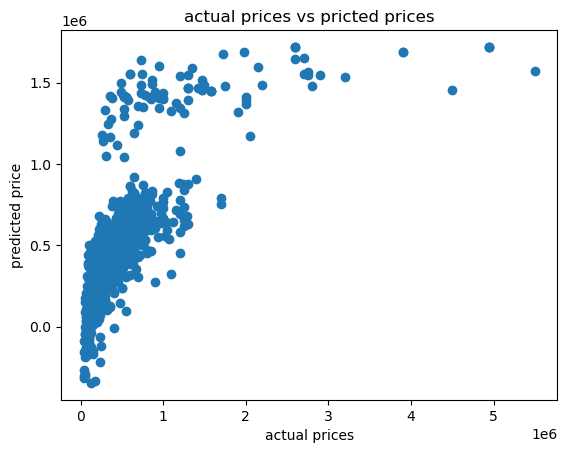

In [103]:
plt.scatter(y_test,testing_data_pred)
plt.xlabel("actual prices")
plt.ylabel("predicted price")
plt.title("actual prices vs pricted prices")
plt.show()

# 2.lasso regression

In [104]:
lass_reg_model=Lasso()

In [105]:
lass_reg_model.fit(x_train,y_train)

Lasso()

## model evaluation

In [106]:
# prediction on training data
training_data_prediction=lass_reg_model.predict(x_train)

In [107]:
training_data_prediction

array([ 670521.11940075,  565753.80061769, 1307201.91802001, ...,
        532134.53725594,  403197.53913096,  546423.05089927])

In [108]:
# r square error
error_score=metrics.r2_score(y_train,training_data_prediction)
error_score

0.43922410631884656

## visualize the actual price and pricted prices

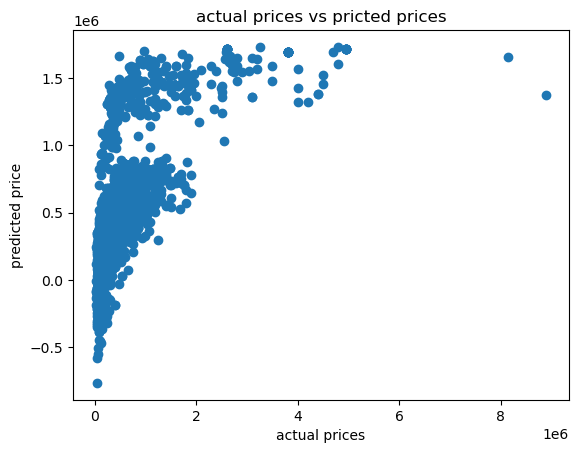

In [109]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("actual prices")
plt.ylabel("predicted price")
plt.title("actual prices vs pricted prices")
plt.show()

In [110]:
# prediction on testing data
testing_data_prediction=lass_reg_model.predict(x_test)

In [111]:
testing_data_prediction

array([ 5.07367080e+05,  1.41600518e+06,  2.18976159e+05,  1.36929032e+06,
        7.15895077e+05,  4.57941093e+05,  4.02736699e+05, -2.95282414e+04,
        3.40367453e+05,  5.53449467e+05,  2.52625929e+05,  1.11052956e+05,
        1.24027334e+06,  6.51393270e+05, -1.27991965e+05,  1.59579197e+06,
        5.64101279e+05,  5.72588329e+05,  1.45333927e+06,  4.16159572e+05,
        6.41456113e+05,  3.50638707e+05,  1.23228090e+05,  1.17547096e+06,
        1.54852144e+06,  4.57941093e+05,  1.48338018e+06,  7.02505787e+05,
        3.35728129e+05,  2.28335860e+05,  3.38453678e+05,  1.10794062e+05,
        7.76816864e+05,  5.98194984e+05,  6.81897715e+04,  1.45333927e+06,
        5.00669489e+05,  3.46380066e+05,  5.60644400e+05,  5.34319258e+05,
        7.93600971e+05,  8.72998461e+05,  1.37374965e+06,  7.33598369e+05,
        1.71860578e+06,  3.11908795e+05,  5.40397143e+05,  5.47332021e+05,
        6.35408361e+05,  2.80037699e+05,  5.10499925e+05,  3.42913004e+05,
        4.36386468e+05,  

In [112]:
# r square error
error_score=metrics.r2_score(y_test,testing_data_prediction)
error_score

0.4998827106629774

### visualization on test data

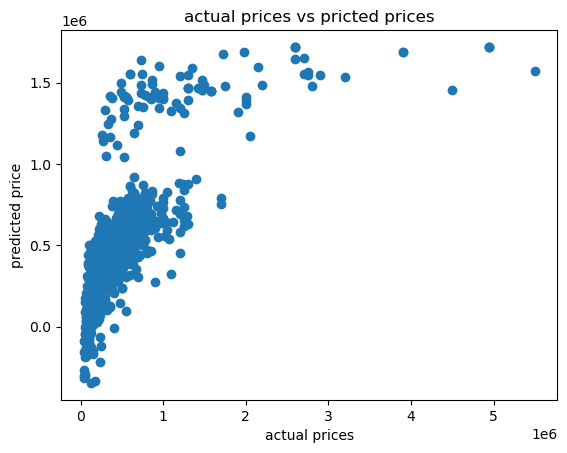

In [114]:
plt.scatter(y_test,testing_data_prediction)
plt.xlabel("actual prices")
plt.ylabel("predicted price")
plt.title("actual prices vs pricted prices")
plt.show()